# Seaborn Heatmap Q&A

In [1]:
import seaborn as sns

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [14]:
sns.__version__

'0.11.0'

In [2]:
cars = sns.load_dataset('mpg')

In [3]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## Does the Seaborn Heatmap accept MultiIndex DataFrames?  Yes.

In [4]:
grp_cyl = (cars
           .groupby('origin')
           .cylinders
           .value_counts()
          )

In [5]:
grp_cyl

origin  cylinders
europe  4             63
        6              4
        5              3
japan   4             69
        6              6
        3              4
usa     8            103
        6             74
        4             72
Name: cylinders, dtype: int64

This series must be converted to a pandas DataFrame.  But a MultiIndex is allowed and will just be hyphenated by Seaborn.

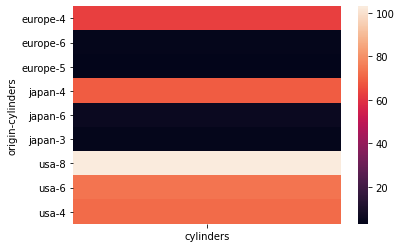

In [7]:
sns.heatmap(pd.DataFrame(grp_cyl)); 

In [8]:
grp_year = (cars
            .groupby(['origin', 'model_year'])
            [['cylinders', 'displacement']]
            .mean()
           )

In [11]:
grp_year.sample(5, random_state=11)

cylinders  displacement
origin model_year                         
usa    75           6.400000    253.400000
japan  80           4.076923    104.615385
       76           4.500000    107.250000
europe 78           4.833333    126.166667
       79           4.250000    126.000000

**!!!** Be careful about scale though!  

Average cylinders is much smaller than average displacement, so the heatmap maps the entire cylinders column to a similar color.

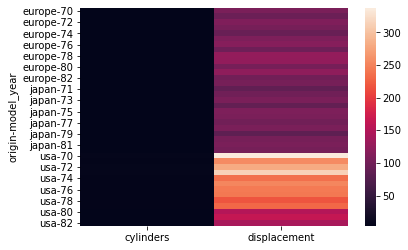

In [13]:
sns.heatmap(grp_year);